In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as Models
import matplotlib.pyplot as plt
import random as rn

In [102]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

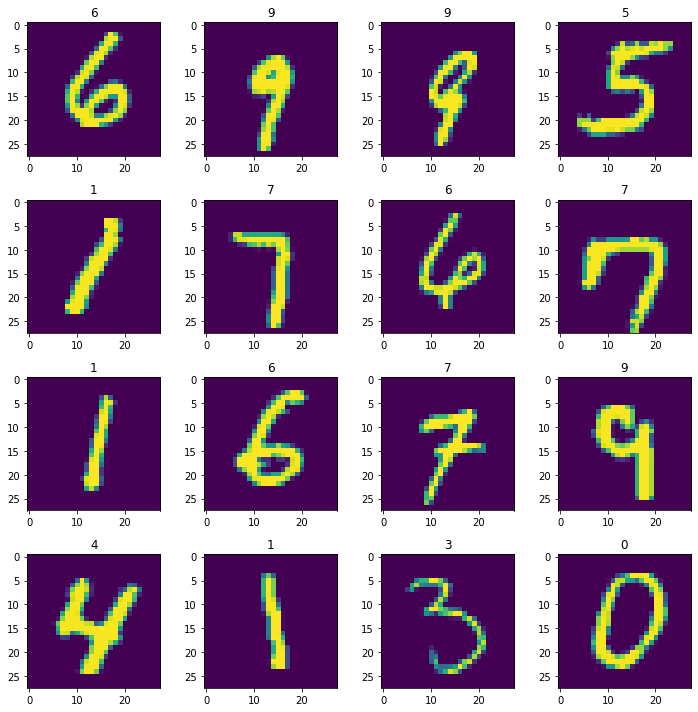

In [101]:
plt.figure(figsize=(10,10))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    temp = rn.randint(0,X_train.shape[0])
    plt.imshow(X_train[temp])
    plt.title(Y_train[temp])
plt.tight_layout()

In [103]:
X_train = X_train/255
X_test = X_test/255

In [104]:
input_data = layers.Input(shape=(28,28))
lstm = layers.LSTM(50,activation='relu')(input_data)
output = layers.Dense(10,activation='softmax')(lstm)


In [105]:
lstm_model = tf.keras.models.Model(input_data,output)

In [106]:
lstm_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_27 (LSTM)              (None, 50)                15800     
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [107]:
lstm_model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy")

In [108]:
lstm_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.6008
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1816
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1276
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1001
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0841
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0712
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0635
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0557
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0517
Epoch 10/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0437


In [132]:
X_test = np.reshape(X_test, (X_test.shape[0],1,28,28))

1/1 [==============================] - 0s 40ms/step


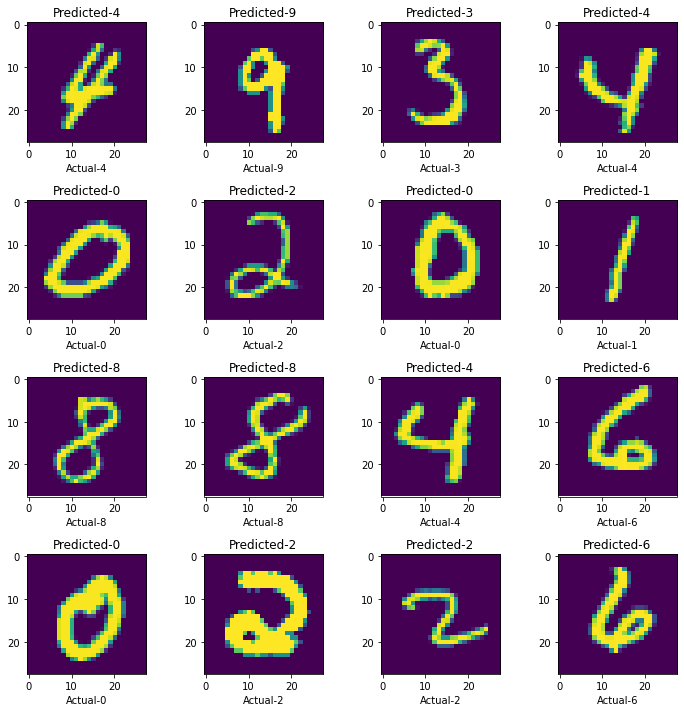

In [115]:
plt.figure(figsize=(10,10))
for i in range(0,16):
    temp = rn.randint(0,X_test.shape[0])
    plt.subplot(4,4,i+1)
    plt.imshow(np.reshape(X_test[temp],(28,28)))
    plt.title("Predicted-{0}".format(np.argmax(lstm_model.predict(X_test[temp]))))
    plt.xlabel("Actual-{0}".format(Y_test[temp]))
plt.tight_layout()


In [129]:
#accuracy
prediction = lstm_model.evaluate(X_test,Y_test)

79/79 [==============================] - 1s 18ms/step - loss: 0.0600


In [135]:
# for accuracy calculation
count=0
for i in range(0,1000):
    temp = rn.randint(0,X_test.shape[0])
    if( Y_test[temp]==np.argmax(lstm_model.predict(X_test[temp]))): count+=1

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 46ms/step


In [137]:
#accuracy
print("accuracy={0}".format(count/1000))

accuracy=0.98
